In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd

Исследуем предложенные критерии нормальности.

### Критерий Лиллиефорса

In [20]:
from statsmodels.stats.diagnostic import lilliefors

def get_num_of_rejected(criterion, num_of_exp, alpha, sample_size, rng, **kwargs):
    """
    Count the number of rejected hypotheses out of num_of_exp.
    
    Parameters
        ----------
        test: Callable
            A statistical test to use
        num_of_exp : int
            The number of samples
        alpha : float
        sample_size : int
        rng : Callable
            A function that generates a sample
    """
    
    rejected = 0
    for i in range(num_of_exp):
        s = rng.rvs(**kwargs, size=sample_size)
        if criterion(s)[1] <= alpha:
            rejected += 1

    return rejected

Посчитаем эмпирическую мощность для разных размеров выборок и для разных параметров распределений (чтобы исключить влияние параметров истинного распределения на мощность).

In [31]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Распределение Лапласса\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        n_rej = get_num_of_rejected(partial(lilliefors, dist='norm', pvalmethod='table'), 
                            num_of_exp, alpha, sample_size, st.laplace, loc=loc, scale=scale)
        print(n_rej / num_of_exp, end=' ')
    print()

Распределение Лапласса

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.139 0.14 0.134 0.15 0.143 0.131 0.135 0.141 0.138 0.164 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.436 0.437 0.442 0.435 0.429 0.439 0.457 0.441 0.442 0.448 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.7 0.698 0.702 0.736 0.728 0.703 0.681 0.705 0.698 0.694 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 1.0 0.999 1.0 1.0 1.0 1.0 1.0 0.998 1.0 1.0 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


In [32]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Распределение Стьюдента\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        df = np.random.randint(5, 10)
        n_rej = get_num_of_rejected(partial(lilliefors, dist='norm', pvalmethod='table'), 
                            num_of_exp, alpha, sample_size, st.t, df=df)
        print(n_rej / num_of_exp, end=' ')
    print()

Распределение Стьюдента

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.076 0.058 0.087 0.101 0.071 0.112 0.065 0.073 0.065 0.089 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.113 0.121 0.17 0.112 0.138 0.202 0.117 0.16 0.102 0.235 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.153 0.118 0.116 0.335 0.14 0.116 0.158 0.197 0.169 0.253 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 0.715 0.876 0.359 0.891 0.53 0.865 0.539 0.388 0.301 0.28 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 0.842 0.934 0.847 0.996 0.95 0.567 0.562 0.692 0.556 0.994 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 0.974 0.997 0.913 0.998 0.994 0.925 1.0 0.999 1.0 0.914 


In [33]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Усеченное нормальное распределение\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        n_rej = get_num_of_rejected(partial(lilliefors, dist='norm', pvalmethod='table'), 
                            num_of_exp, alpha, sample_size, st.truncnorm, loc=loc, scale=scale, a=-2, b=2)
        print(n_rej / num_of_exp, end=' ')
    print()

Усеченное нормальное распределение

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.051 0.044 0.041 0.042 0.043 0.044 0.033 0.037 0.052 0.047 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.058 0.051 0.043 0.046 0.043 0.039 0.046 0.044 0.044 0.049 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.06 0.071 0.059 0.062 0.068 0.061 0.061 0.053 0.064 0.068 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 0.167 0.175 0.158 0.16 0.161 0.156 0.17 0.156 0.174 0.158 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 0.42 0.439 0.422 0.418 0.432 0.441 0.429 0.391 0.444 0.416 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 0.915 0.914 0.896 0.917 0.918 0.92 0.93 0.921 0.919 0.916 


In [37]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Нормальное распределение\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически ошибка первого рода равна: ', 
          end='')
    n_rej = get_num_of_rejected(partial(lilliefors, dist='norm', pvalmethod='table'), 
                            num_of_exp, alpha, sample_size, st.norm, loc=loc, scale=scale)
    print(n_rej / num_of_exp)

Нормальное распределение

Для размера выборки 10 эмпирически ошибка первого рода равна: 0.042
Для размера выборки 50 эмпирически ошибка первого рода равна: 0.05
Для размера выборки 100 эмпирически ошибка первого рода равна: 0.048
Для размера выборки 500 эмпирически ошибка первого рода равна: 0.047
Для размера выборки 1000 эмпирически ошибка первого рода равна: 0.032
Для размера выборки 2000 эмпирически ошибка первого рода равна: 0.038


Вывод: как можно заметить, критерий Лиллиефорса гораздо реже отклоняет гипотезы, истинное распределение которых сильно отличается от нормального только в хвостах. Асимптотически мощность критерия стремится к единице, но довольно мала при небольших размерах выборок. Последний эксперимент указывает на консервативность критерия (доля отклоненных гипотез при условии истинности нулевой ниже уровня значимости).

### Критерий Харке-Бера

In [43]:
from statsmodels.stats.stattools import jarque_bera
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Распределение Лапласса\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        n_rej = get_num_of_rejected(jarque_bera, num_of_exp, alpha, sample_size, 
                                    st.laplace, loc=loc, scale=scale)
        print(n_rej / num_of_exp, end=' ')
    print()

Распределение Лапласса

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.066 0.054 0.068 0.06 0.067 0.065 0.047 0.049 0.069 0.061 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.495 0.503 0.493 0.501 0.508 0.531 0.5 0.501 0.508 0.492 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.769 0.783 0.791 0.768 0.796 0.795 0.767 0.787 0.781 0.781 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 1.0 0.999 1.0 1.0 1.0 1.0 0.999 1.0 1.0 0.999 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


In [44]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Распределение Стьюдента\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        df = np.random.randint(5, 10)
        n_rej = get_num_of_rejected(jarque_bera, num_of_exp, alpha, sample_size, 
                                    st.t, df=df)
        print(n_rej / num_of_exp, end=' ')
    print()

Распределение Стьюдента

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.027 0.025 0.016 0.051 0.032 0.016 0.018 0.023 0.037 0.052 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.323 0.192 0.412 0.188 0.196 0.336 0.374 0.331 0.233 0.296 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.439 0.514 0.494 0.36 0.312 0.517 0.611 0.378 0.429 0.44 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 0.933 0.818 0.823 0.993 0.931 0.88 0.821 0.876 0.925 0.94 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 0.996 1.0 0.996 0.998 1.0 0.958 0.996 0.984 0.999 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 0.998 0.998 1.0 1.0 1.0 0.999 


In [45]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Усеченное нормальное распределение\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        n_rej = get_num_of_rejected(jarque_bera, 
                            num_of_exp, alpha, sample_size, st.truncnorm, loc=loc, scale=scale, a=-2, b=2)
        print(n_rej / num_of_exp, end=' ')
    print()

Усеченное нормальное распределение

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.002 0.003 0.002 0.002 0.004 0.005 0.002 0.003 0.006 0.003 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.001 0.001 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.001 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.002 0.0 0.002 0.001 0.001 0.0 0.002 0.0 0.002 0.0 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 0.896 0.903 0.886 0.896 0.901 0.884 0.909 0.905 0.888 0.901 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 0.999 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


In [46]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Нормальное распределение\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически ошибка первого рода равна: ', 
          end='')
    n_rej = get_num_of_rejected(jarque_bera, 
                            num_of_exp, alpha, sample_size, st.norm, loc=loc, scale=scale)
    print(n_rej / num_of_exp)

Нормальное распределение

Для размера выборки 10 эмпирически ошибка первого рода равна: 0.011
Для размера выборки 50 эмпирически ошибка первого рода равна: 0.041
Для размера выборки 100 эмпирически ошибка первого рода равна: 0.036
Для размера выборки 500 эмпирически ошибка первого рода равна: 0.039
Для размера выборки 1000 эмпирически ошибка первого рода равна: 0.061
Для размера выборки 2000 эмпирически ошибка первого рода равна: 0.043


Вывод: критерий Харке-Бера еще менее чуствителен к различиям в хвостах распределений, чем критерий Лиллиефорса, его мощность также асимптотически равна единице. Однако при небольших размерах выборок имеет в более высокую мощность. Консервативен.

### Критерий Шапиро-Уилка

In [47]:
from statsmodels.stats.stattools import jarque_bera
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Распределение Лапласса\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        n_rej = get_num_of_rejected(st.shapiro, num_of_exp, alpha, sample_size, 
                                    st.laplace, loc=loc, scale=scale)
        print(n_rej / num_of_exp, end=' ')
    print()

Распределение Лапласса

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.155 0.158 0.158 0.158 0.157 0.15 0.143 0.147 0.156 0.178 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.519 0.541 0.528 0.503 0.51 0.539 0.52 0.523 0.524 0.494 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.785 0.785 0.786 0.805 0.809 0.814 0.791 0.818 0.795 0.793 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


In [48]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Распределение Стьюдента\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        df = np.random.randint(5, 10)
        n_rej = get_num_of_rejected(st.shapiro, num_of_exp, alpha, sample_size, 
                                    st.t, df=df)
        print(n_rej / num_of_exp, end=' ')
    print()

Распределение Стьюдента

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.112 0.077 0.116 0.124 0.081 0.083 0.112 0.057 0.116 0.092 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.182 0.365 0.23 0.177 0.245 0.235 0.207 0.169 0.211 0.189 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.26 0.354 0.324 0.56 0.548 0.384 0.277 0.423 0.581 0.476 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 0.907 0.995 0.814 0.733 0.986 0.896 0.775 0.888 0.734 0.752 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 0.994 0.998 0.992 0.995 1.0 0.993 0.948 0.998 0.941 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 0.999 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


In [49]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Усеченное нормальное распределение\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически мощности при различных случайных параметрах равны: ', 
          end='')
    for j in range(10):
        loc = (np.random.rand() - 0.5) * 100
        scale = np.random.rand() * 100
        n_rej = get_num_of_rejected(st.shapiro, 
                            num_of_exp, alpha, sample_size, st.truncnorm, loc=loc, scale=scale, a=-2, b=2)
        print(n_rej / num_of_exp, end=' ')
    print()

Усеченное нормальное распределение

Для размера выборки 10 эмпирически мощности при различных случайных параметрах равны: 0.042 0.043 0.031 0.038 0.042 0.033 0.043 0.028 0.042 0.032 
Для размера выборки 50 эмпирически мощности при различных случайных параметрах равны: 0.046 0.053 0.05 0.04 0.057 0.056 0.059 0.049 0.045 0.048 
Для размера выборки 100 эмпирически мощности при различных случайных параметрах равны: 0.11 0.12 0.122 0.124 0.116 0.119 0.131 0.143 0.115 0.116 
Для размера выборки 500 эмпирически мощности при различных случайных параметрах равны: 0.995 0.993 0.999 0.997 0.995 0.996 0.997 0.994 0.997 0.996 
Для размера выборки 1000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 
Для размера выборки 2000 эмпирически мощности при различных случайных параметрах равны: 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 


In [50]:
from functools import partial

num_of_exp = 1000
alpha = 0.05
print("Нормальное распределение\n")

for sample_size in [10, 50, 100, 500, 1000, 2000]:
    print(f'Для размера выборки {sample_size} эмпирически ошибка первого рода равна: ', 
          end='')
    n_rej = get_num_of_rejected(st.shapiro, 
                            num_of_exp, alpha, sample_size, st.norm, loc=loc, scale=scale)
    print(n_rej / num_of_exp)

Нормальное распределение

Для размера выборки 10 эмпирически ошибка первого рода равна: 0.047
Для размера выборки 50 эмпирически ошибка первого рода равна: 0.045
Для размера выборки 100 эмпирически ошибка первого рода равна: 0.057
Для размера выборки 500 эмпирически ошибка первого рода равна: 0.059
Для размера выборки 1000 эмпирически ошибка первого рода равна: 0.057
Для размера выборки 2000 эмпирически ошибка первого рода равна: 0.056


Вывод: критерий Шапиро-Уилка более чувствителен к различиям в хвостах, асимптотически имеет мощность единицу, но, в отличие от двух предыдущих критериев, является либеральным.

Ради наглядности построим графики зависимости эмпирической мощности от размера выборки.

In [51]:
from statsmodels.stats.stattools import jarque_bera
from functools import partial

num_of_exp = 1000
alpha = 0.05
shap = []
lill = []
jarq = []
for sample_size in [10, 20, 50, 100, 200, 500, 1000, 2000]:
    shap_rej = get_num_of_rejected(st.shapiro, num_of_exp, alpha, sample_size, 
                                    st.laplace)
    shap.append(shap_rej / num_of_exp)
    lill_rej = get_num_of_rejected(partial(lilliefors, dist='norm', pvalmethod='table'),
                                   num_of_exp, alpha, sample_size, st.laplace)
    lill.append(lill_rej / num_of_exp)
    jarq_rej = get_num_of_rejected(jarque_bera, num_of_exp, alpha, sample_size, 
                                    st.laplace)
    jarq.append(jarq_rej / num_of_exp)

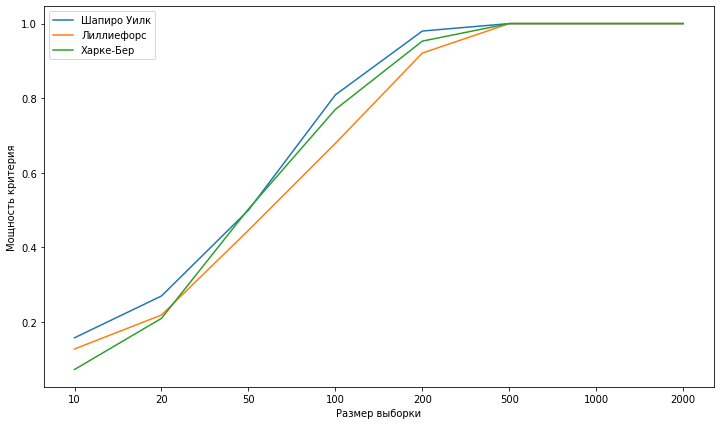

In [62]:
from matplotlib import pyplot as plt
import pylab

fig = plt.figure(figsize=(12, 7))
plt.plot(shap, label='Шапиро Уилк')
plt.plot(lill, label='Лиллиефорс')
plt.plot(jarq, label='Харке-Бер')
pylab.xticks(range(8), [10, 20, 50, 100, 200, 500, 1000, 2000])
plt.ylabel('Мощность критерия')
plt.xlabel('Размер выборки')
plt.legend()
plt.show()